TESS Light Curve Filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from wotan import flatten
import pickle

In [ ]:
HATP44_TESS_sector023 = pickle.load(open('HATP44_TESS_sector023_selected.p', 'rb'))

time = HATP44_TESS_sector023['time']
sap_flux =  HATP44_TESS_sector023['sap_flux']
sap_flux_error = HATP44_TESS_sector023['sap_flux_error']

pdcsap_flux =  HATP44_TESS_sector023['pdcsap_flux']
pdcsap_flux_error = HATP44_TESS_sector023['pdcsap_flux_error']

In [ ]:
sap_flatten_flux, sap_flatten_model = flatten(
    time,                   # Array of time values
    sap_flux,               # Array of flux values
    method='biweight',
    window_length=0.25,      # The knot distance in units of ``time``
    break_tolerance=0.5,    # Split into segments at breaks longer than that
    return_trend = True     # Return trend and flattened light curve
)

NameError: name 'time' is not defined

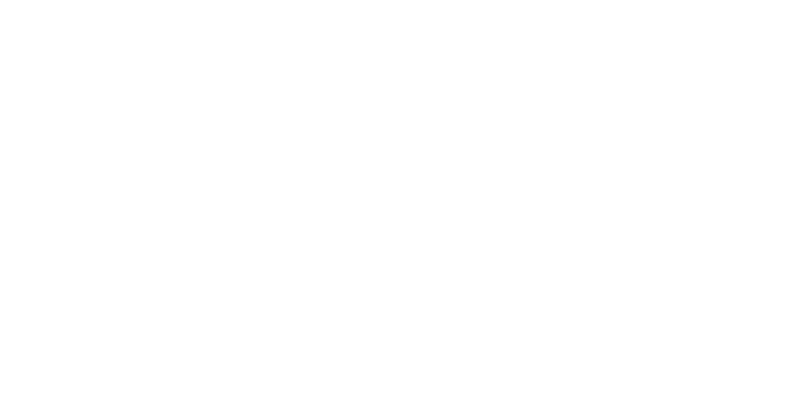

In [2]:
plt.figure(figsize=(8,4))
plt.scatter(time, sap_flux, s=2)
plt.plot(time, sap_flatten_model, c='C1', zorder=10)
plt.show()

Go to https://exofop.ipac.caltech.edu/tess/

Search target: WASP-12

Go to TOIS and copy the following data to the next cell- epoch, period, transit duration

In [ ]:
t_epoch = 2458842.997159 #in jupyter notebook on moodle, called transit time
period = 1.0914304469578
transit_duration = 3.0512300389977/24 #days

In [ ]:
phase_folded_time = time % period
print(phase_folded_time)

In [ ]:
##to get it in the middle:
phase_time2 = (time - t_epoch - period/2) % period - period/2

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(phase_folded_time, sap_flatten_flux, x=2)
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(phase_time2, sap_flatten_flux, x=2)
plt.xlim(-0.3,0.3)
plt.axhline(1.0, c='C1')
plt.show()

In [ ]:
from wotan import transit_mask

In [ ]:
mask = transit_mask(
    time=time,
    period = period,
    duration = transit_duration * 2,
    T0 = t_epoch)

In [ ]:
##new modeling with a different name to avoid overwriting the previous example

In [ ]:
sap_masked_flatten_flux, sap_masked_flatten_model = flatten(
    time,                   # Array of time values
    sap_flux,               # Array of flux values
    method='biweight',
    window_length=0.25,      # The knot distance in units of ``time``
    break_tolerance=0.5,    # Split into segments at breaks longer than that
    return_trend = True     # Return trend and flattened light curve
    mask = mask
)

In [ ]:
sap_masked_w5_flatten_flux, sap_masked_w5_flatten_model = flatten(  ##CHANGING WINDOW LENGTH
    time,                   # Array of time values
    sap_flux,               # Array of flux values
    method='biweight',
    window_length=0.5,      # The knot distance in units of ``time``
    break_tolerance=0.5,    # Split into segments at breaks longer than that
    return_trend = True     # Return trend and flattened light curve
    mask = mask
)

In [ ]:
##Do this again for STD =2.0

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(time, sap_flux, s=2)
plt.plot(time, sap_flatten_model, c='C1', zorder=10)
plt.plot(time, sap_masked_flatten_model, c = 'C2')
plt.plot(time, sap_masked_w5_flatten_model, c = 'C2')
plt.show()

In [ ]:
print('STD w=0.25, no mask', np.std(sap_flatten_flux[-mask]))
print('STD w=0.25, with mask', np.std(sap_masked_flatten_flux[-mask]))
print('STD w=0.5, with mask', np.std(sap_masked_w5_flatten_flux[-mas]))
print('STD w=2.00, with mask', np.std(sap_masked_w20_flatten_flux[-mask]))
print('Median error', np.median(sap_flux_error/sap_masked_w5_flatten_model))

In [ ]:
sector_23_dictionary = {
    'time' = time
    'selected_flux' = sap_masked_w5_flatten_flux
    'selected_flux_error' = sap_flux_error/ sap_masked_w5_flatten_model
    'sap_masked_w20_flatten_flux' = sap_masked_w20_flatten_flux
    'sap_masked_w20_flatten_model' = sap_masked_w20_flatten_model
    ...
    ...
    ...
}